In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv("C:\\Users\\suraj\\Downloads\\Flight_Booking (1)(1).csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [28]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [31]:
df['Hours']=df['duration'].astype(int)
df['minutes']=((df['duration'] - df['Hours'] )*60).astype(int)

In [32]:
df.drop(columns='Unnamed: 0',inplace=True)

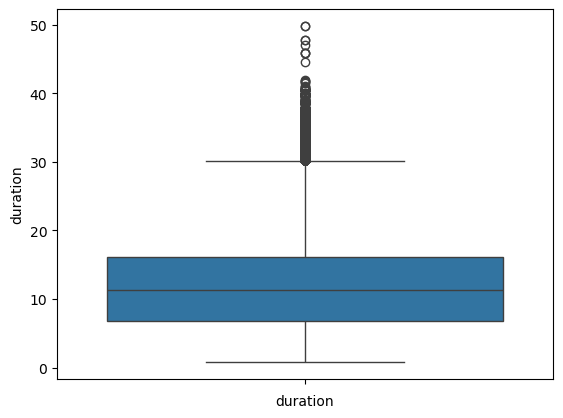

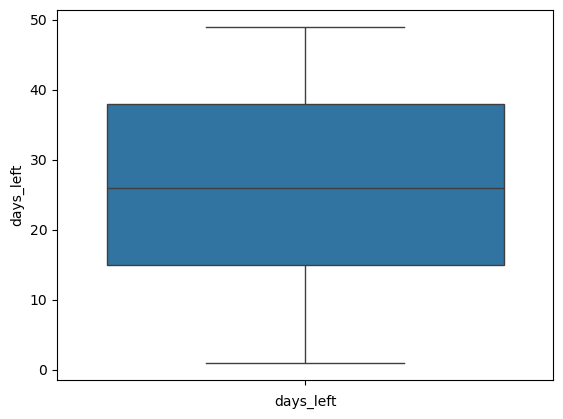

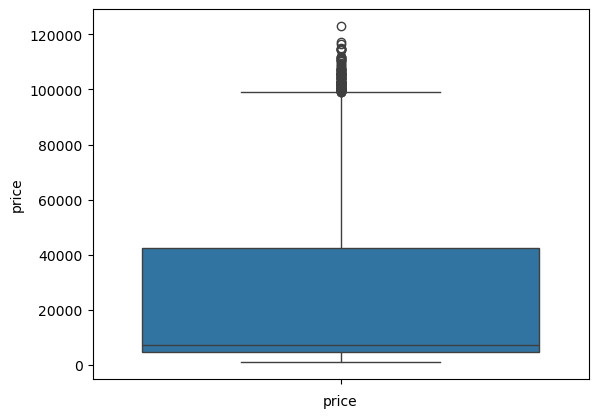

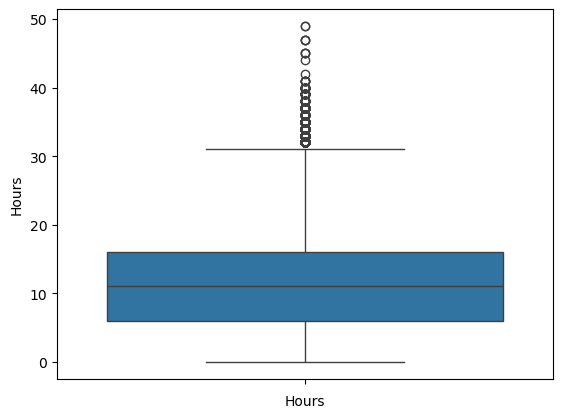

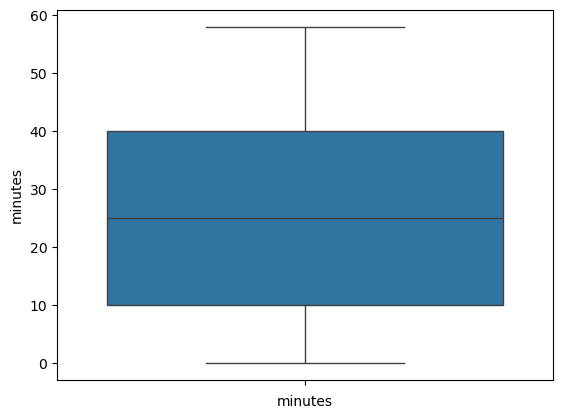

In [33]:
for i in df.columns:
    if df[i].dtype !='object':
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

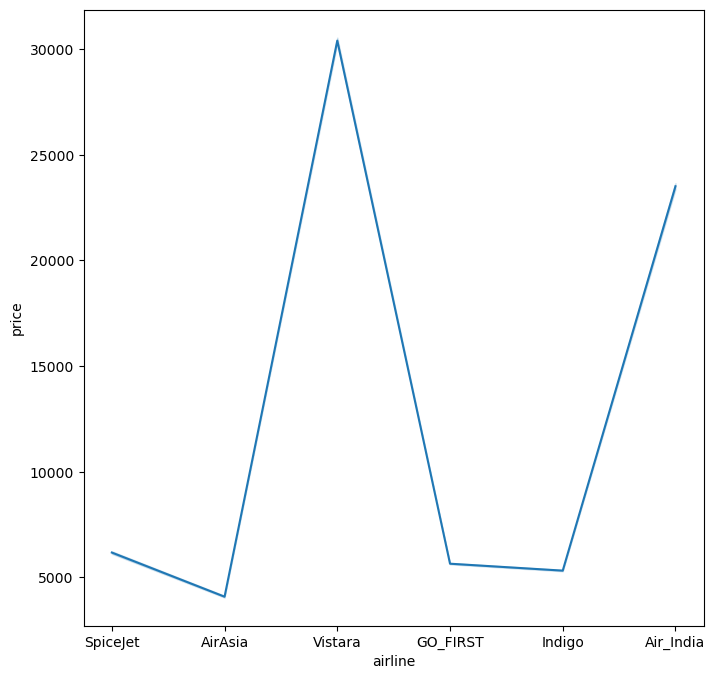

In [34]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='airline',y='price')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [38]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Hours,minutes
0,4,1408,2,2,2,5,5,1,2.17,1,5953,2,10
1,4,1387,2,1,2,4,5,1,2.33,1,5953,2,19
2,0,1213,2,1,2,1,5,1,2.17,1,5956,2,10
3,5,1559,2,4,2,0,5,1,2.25,1,5955,2,15
4,5,1549,2,4,2,4,5,1,2.33,1,5955,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265,10,4
300149,5,1481,1,0,0,5,3,0,10.42,49,77105,10,25
300150,5,1486,1,1,0,5,3,0,13.83,49,79099,13,49
300151,5,1483,1,1,0,2,3,0,10.00,49,81585,10,0


In [44]:
df.drop(columns='duration',inplace=True)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [46]:
col_list=[]
for i in df.columns:
    if ((df[i].dtype !='object') & (i !='price')):
        col_list.append(i)

X=df[col_list]
vif_data=pd.DataFrame()

vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values, a) for a in range(len(X.columns))]

print(vif_data)


             feature        VIF
0            airline   6.701874
1             flight  12.767778
2        source_city   2.995032
3     departure_time   2.812034
4              stops   1.444730
5       arrival_time   3.816673
6   destination_city   2.948443
7              class   2.909610
8          days_left   4.121353
9              Hours   4.555054
10           minutes   3.009385


In [48]:
X=df.drop(columns=['price','flight'])
y=df['price']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.80)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [62]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [70]:
## Linear Regression model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)


0.9038809486620772
4680.348331273873
0.4351558195824654
49907605.55794507
7064.531517230642


In [76]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
r2=r2_score(y_test, y_pred)

mae=mean_absolute_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)

0.9767647762560953
1155.4410387966218
0.0732910087638125
12064355.250288276
3473.3780747693268


In [78]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)

mae=mean_absolute_error(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(r2)
print(mae)
print(mape)
print(mse)
print(rmse)

0.9767647762560953
1079.594683576827
0.06954330258174604
7604644.561524626
2757.6520015267747


C:\Users\suraj\AppData\Local\Temp\ipykernel_56836\2756520603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
C:\Users\suraj\AppData\Local\Temp\ipykernel_56836\2756520603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


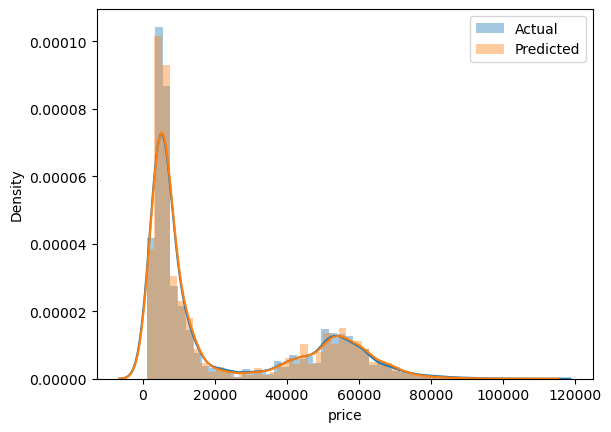

In [82]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')

plt.legend()